In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

### Chart Function

In [6]:
def plot_results(file_paths, labels):
    """
    Plots various metrics from machine learning training runs.

    Parameters:
    - file_paths: List of strings representing the file paths to CSV files.
    - labels: List of strings representing the labels for each dataset.
    """

    # Read DataFrames
    dataframes = [pd.read_csv(fp) for fp in file_paths]
    num_datasets = len(dataframes)

    # Extract data
    epochs_list = [df['Epoch'] for df in dataframes]
    test_accuracy_list = [df['Test Accuracy'] for df in dataframes]
    training_loss_list = [df['Training Loss'] for df in dataframes]
    test_loss_list = [df['Test Loss'] for df in dataframes]
    training_grad_norm_list = [df['Training Gradient Norm'] for df in dataframes]
    test_grad_norm_list = [df['Test Gradient Norm'] for df in dataframes]
    total_training_time_list = [df['Training Time (s)'].cumsum() for df in dataframes]

    # Check if Epochs are the same across datasets
    epochs = epochs_list[0]
    for idx, e in enumerate(epochs_list[1:], start=1):
        if not epochs.equals(e):
            print(f"Warning: Epochs in dataset {idx+1} differ from the first dataset.")

    # Set up colors using a colormap
    cmap_name = 'tab10' if num_datasets <= 10 else 'tab20'
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i % cmap.N) for i in range(num_datasets)]

    # Create subplots with 5 rows and 2 columns
    fig, axes = plt.subplots(5, 2, figsize=(20, 30))

    # Row 1: Test Accuracy over Epochs and Training Time
    # Plot 1: Test Accuracy over Epochs (left plot)
    for i in range(num_datasets):
        axes[0, 0].plot(epochs_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Test Accuracy')
    axes[0, 0].set_title(f'Test Accuracy over {len(epochs)} Epochs')
    axes[0, 0].legend()

    # Plot 2: Test Accuracy vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[0, 1].plot(total_training_time_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 1].set_xlabel('Training Time (s)')
    axes[0, 1].set_ylabel('Test Accuracy')
    axes[0, 1].set_title('Test Accuracy vs Total Training Time')
    axes[0, 1].legend()

    # Row 2: Training Loss over Epochs and Test Loss over Epochs
    # Plot 3: Training Loss over Epochs (left plot)
    for i in range(num_datasets):
        axes[1, 0].plot(epochs_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Training Loss')
    axes[1, 0].set_title(f'Training Loss over {len(epochs)} Epochs')
    axes[1, 0].legend()

    # Plot 4: Test Loss over Epochs (right plot)
    for i in range(num_datasets):
        axes[1, 1].plot(epochs_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Test Loss (MSE)')
    axes[1, 1].set_title(f'Test Loss over {len(epochs)} Epochs')
    axes[1, 1].legend()

    # Row 3: Training Gradient Norm over Epochs and Test Gradient Norm over Epochs
    # Plot 5: Training Gradient Norm over Epochs (left plot)
    for i in range(num_datasets):
        axes[2, 0].plot(epochs_list[i], training_grad_norm_list[i], label=labels[i], color=colors[i])
    axes[2, 0].set_xlabel('Epoch')
    axes[2, 0].set_ylabel('Gradient Norm')
    axes[2, 0].set_title(f'Training Gradient Norm over {len(epochs)} Epochs')
    axes[2, 0].legend()

    # Plot 6: Test Gradient Norm over Epochs (right plot)
    for i in range(num_datasets):
        axes[2, 1].plot(epochs_list[i], test_grad_norm_list[i], label=labels[i], color=colors[i])
    axes[2, 1].set_xlabel('Epoch')
    axes[2, 1].set_ylabel('Gradient Norm')
    axes[2, 1].set_title(f'Test Gradient Norm over {len(epochs)} Epochs')
    axes[2, 1].legend()

    # Row 4: Training Loss vs Total Training Time and Test Loss vs Total Training Time
    # Plot 7: Training Loss vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[3, 0].plot(total_training_time_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 0].set_xlabel('Training Time (s)')
    axes[3, 0].set_ylabel('Training Loss')
    axes[3, 0].set_title('Training Loss vs Total Training Time')
    axes[3, 0].legend()

    # Plot 8: Test Loss vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[3, 1].plot(total_training_time_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 1].set_xlabel('Training Time (s)')
    axes[3, 1].set_ylabel('Test Loss (MSE)')
    axes[3, 1].set_title('Test Loss vs Total Training Time')
    axes[3, 1].legend()

    # Row 5: Training Gradient Norm vs Total Training Time and Test Gradient Norm vs Total Training Time
    # Plot 9: Training Gradient Norm vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[4, 0].plot(total_training_time_list[i], training_grad_norm_list[i], label=labels[i], color=colors[i])
    axes[4, 0].set_xlabel('Training Time (s)')
    axes[4, 0].set_ylabel('Gradient Norm')
    axes[4, 0].set_title('Training Gradient Norm vs Total Training Time')
    axes[4, 0].legend()

    # Plot 10: Test Gradient Norm vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[4, 1].plot(total_training_time_list[i], test_grad_norm_list[i], label=labels[i], color=colors[i])
    axes[4, 1].set_xlabel('Training Time (s)')
    axes[4, 1].set_ylabel('Gradient Norm')
    axes[4, 1].set_title('Test Gradient Norm vs Total Training Time')
    axes[4, 1].legend()

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()


### n = 2000, m = 1000

In [ ]:
# GNOM

lr_0_3_file_path = "generated/n_2000_m_1000/GNOM/lr-0.3/200/no_batching/2024-10-03-16:26:55/results.csv"
lr_0_2_file_path = "generated/n_2000_m_1000/GNOM/lr-0.2/200/no_batching/2024-10-03-16:27:05/results.csv"
lr_0_1_file_path = "generated/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/2024-10-03-16:27:14/results.csv"
lr_0_01_file_path = "generated/n_2000_m_1000/GNOM/lr-0.01/200/no_batching/2024-10-03-16:27:23/results.csv"
lr_0_001_file_path = "generated/n_2000_m_1000/GNOM/lr-0.001/200/no_batching/2024-10-03-16:27:31/results.csv"

files = [lr_0_3_file_path, lr_0_2_file_path, lr_0_1_file_path, lr_0_01_file_path, lr_0_001_file_path]
labels = ["GNOM, lr=0.3", "GNOM, lr=0.2", "GNOM, lr=0.1", "GNOM, lr=0.01", "GNOM, lr=0.001"]

plot_results(files, labels)

In [ ]:
# GNOM with lr 0.05, 0.1, 0.15 0.2

file_path1 = "generated/n_2000_m_1000/GNOM/lr-0.05/200/no_batching/2024-10-04-09:37:45/results.csv"
file_path2 = "generated/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/2024-10-03-16:27:14/results.csv"
file_path3 = "generated/n_2000_m_1000/GNOM/lr-0.15/200/no_batching/2024-10-04-09:37:28/results.csv"
file_path4 = "generated/n_2000_m_1000/GNOM/lr-0.2/200/no_batching/2024-10-03-16:27:05/results.csv"

files = [file_path1, file_path2, file_path3, file_path4]
labels = ["GNOM, lr=0.05", "GNOM, lr=0.1", "GNOM, lr=0.15", "GNOM, lr=0.2"]

plot_results(files, labels)

In [ ]:
# GNOM with lr 0.08, 0.1, 0.12, 0.15

file_path1 = "generated/n_2000_m_1000/GNOM/lr-0.08/200/no_batching/2024-10-04-09:43:47/results.csv"
file_path2 = "generated/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/2024-10-03-16:27:14/results.csv"
file_path3 = "generated/n_2000_m_1000/GNOM/lr-0.12/200/no_batching/2024-10-04-09:43:55/results.csv"
file_path4 = "generated/n_2000_m_1000/GNOM/lr-0.15/200/no_batching/2024-10-04-09:37:28/results.csv"

files = [file_path1, file_path2, file_path3, file_path4]
labels = ["GNOM, lr=0.08", "GNOM, lr=0.1", "GNOM, lr=0.12", "GNOM, lr=0.15"]

plot_results(files, labels)

In [ ]:
# GNOM with lr =0.1, and batch= {full, 256, 128, 64, 32}

file_path1 = "generated/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/2024-10-03-16:27:14/results.csv"
file_path2 = "generated/n_2000_m_1000/GNOM/lr-0.1/200/256/2024-10-04-09:49:10/results.csv"
file_path3 = "generated/n_2000_m_1000/GNOM/lr-0.1/200/128/2024-10-04-09:49:25/results.csv"
file_path4 = "generated/n_2000_m_1000/GNOM/lr-0.1/200/64/2024-10-04-09:49:37/results.csv"
file_path5 = "generated/n_2000_m_1000/GNOM/lr-0.1/200/32/2024-10-04-09:49:49/results.csv"

files = [file_path1, file_path2, file_path3, file_path4, file_path5]
labels = ["GNOM, full", "GNOM, batch=256", "GNOM, batch=128", "GNOM, batch=64", "GNOM, batch=32"]

plot_results(files, labels)

In [ ]:
# SGD

lr_0_3_file_path = "generated/n_2000_m_1000/GD/lr-0.3/200/no_batching/2024-10-03-16:27:59/results.csv"
lr_0_2_file_path = "generated/n_2000_m_1000/GD/lr-0.2/200/no_batching/2024-10-03-16:28:31/results.csv"
lr_0_1_file_path = "generated/n_2000_m_1000/GD/lr-0.1/200/no_batching/2024-10-03-16:28:39/results.csv"
lr_0_01_file_path = "generated/n_2000_m_1000/GD/lr-0.01/200/no_batching/2024-10-03-14:06:21/results.csv"
lr_0_001_file_path = "generated/n_2000_m_1000/GD/lr-0.001/200/no_batching/2024-10-03-16:28:54/results.csv"

files = [lr_0_3_file_path, lr_0_2_file_path, lr_0_1_file_path, lr_0_01_file_path, lr_0_001_file_path]
labels = ["SGD, lr=0.3", "SGD, lr=0.2", "SGD, lr=0.1", "SGD, lr=0.01", "SGD, lr=0.001"]

plot_results(files, labels)

In [ ]:
# SGD w lr = 0.01, 0.3, 0.4, 0.5, 1

file_path1 = "generated/n_2000_m_1000/GD/lr-0.01/200/no_batching/2024-10-03-14:06:21/results.csv"
file_path2 = "generated/n_2000_m_1000/GD/lr-0.3/200/no_batching/2024-10-03-16:27:59/results.csv"
file_path3 = "generated/n_2000_m_1000/GD/lr-0.4/200/no_batching/2024-10-04-10:16:27/results.csv"
file_path4 = "generated/n_2000_m_1000/GD/lr-0.5/200/no_batching/2024-10-04-10:16:37/results.csv"
file_path5 = "generated/n_2000_m_1000/GD/lr-1.0/200/no_batching/2024-10-04-10:16:46/results.csv"

files = [file_path1, file_path2, file_path3, file_path4, file_path5]
labels = ["SGD, lr=0.01", "SGD, lr=0.3", "SGD, lr=0.4", "SGD, lr=0.5", "SGD, lr = 1"]

plot_results(files, labels)

In [ ]:
# SGD w lr = 0.4, batch = {full, 256, 128, 64, 32}

file_path1 = "generated/n_2000_m_1000/GD/lr-0.4/200/no_batching/2024-10-04-10:16:27/results.csv"
file_path2 = "generated/n_2000_m_1000/GD/lr-0.4/200/256/2024-10-04-10:20:53/results.csv"
file_path3 = "generated/n_2000_m_1000/GD/lr-0.4/200/128/2024-10-04-10:21:03/results.csv"
file_path4 = "generated/n_2000_m_1000/GD/lr-0.4/200/64/2024-10-04-10:21:12/results.csv"
file_path5 = "generated/n_2000_m_1000/GD/lr-0.4/200/32/2024-10-04-10:21:22/results.csv"

files = [file_path1, file_path2, file_path3, file_path4, file_path5]
labels = ["SGD, full", "SGD, batch=256", "SGD, batch=128", "SGD, batch=64", "SGD, batch=32"]

plot_results(files, labels)

In [ ]:
# COMPARING BEST RESULTS @200 EPOCHS
# GNOM w lr = 0.1, batch = full, 32
# SGD w lr = 0.4, batch = 128


file_path1 = "generated/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/2024-10-03-16:27:14/results.csv"
file_path2 = "generated/n_2000_m_1000/GNOM/lr-0.1/200/32/2024-10-04-09:49:49/results.csv"
file_path3 = "generated/n_2000_m_1000/GD/lr-0.4/200/128/2024-10-04-10:21:03/results.csv"

files = [file_path1, file_path2, file_path3]
labels = ["GNOM, lr=0.1, batch=full", "GNOM, lr=0.1, batch=32", "SGD, lr=0.4, batch=128"]

plot_results(files, labels)


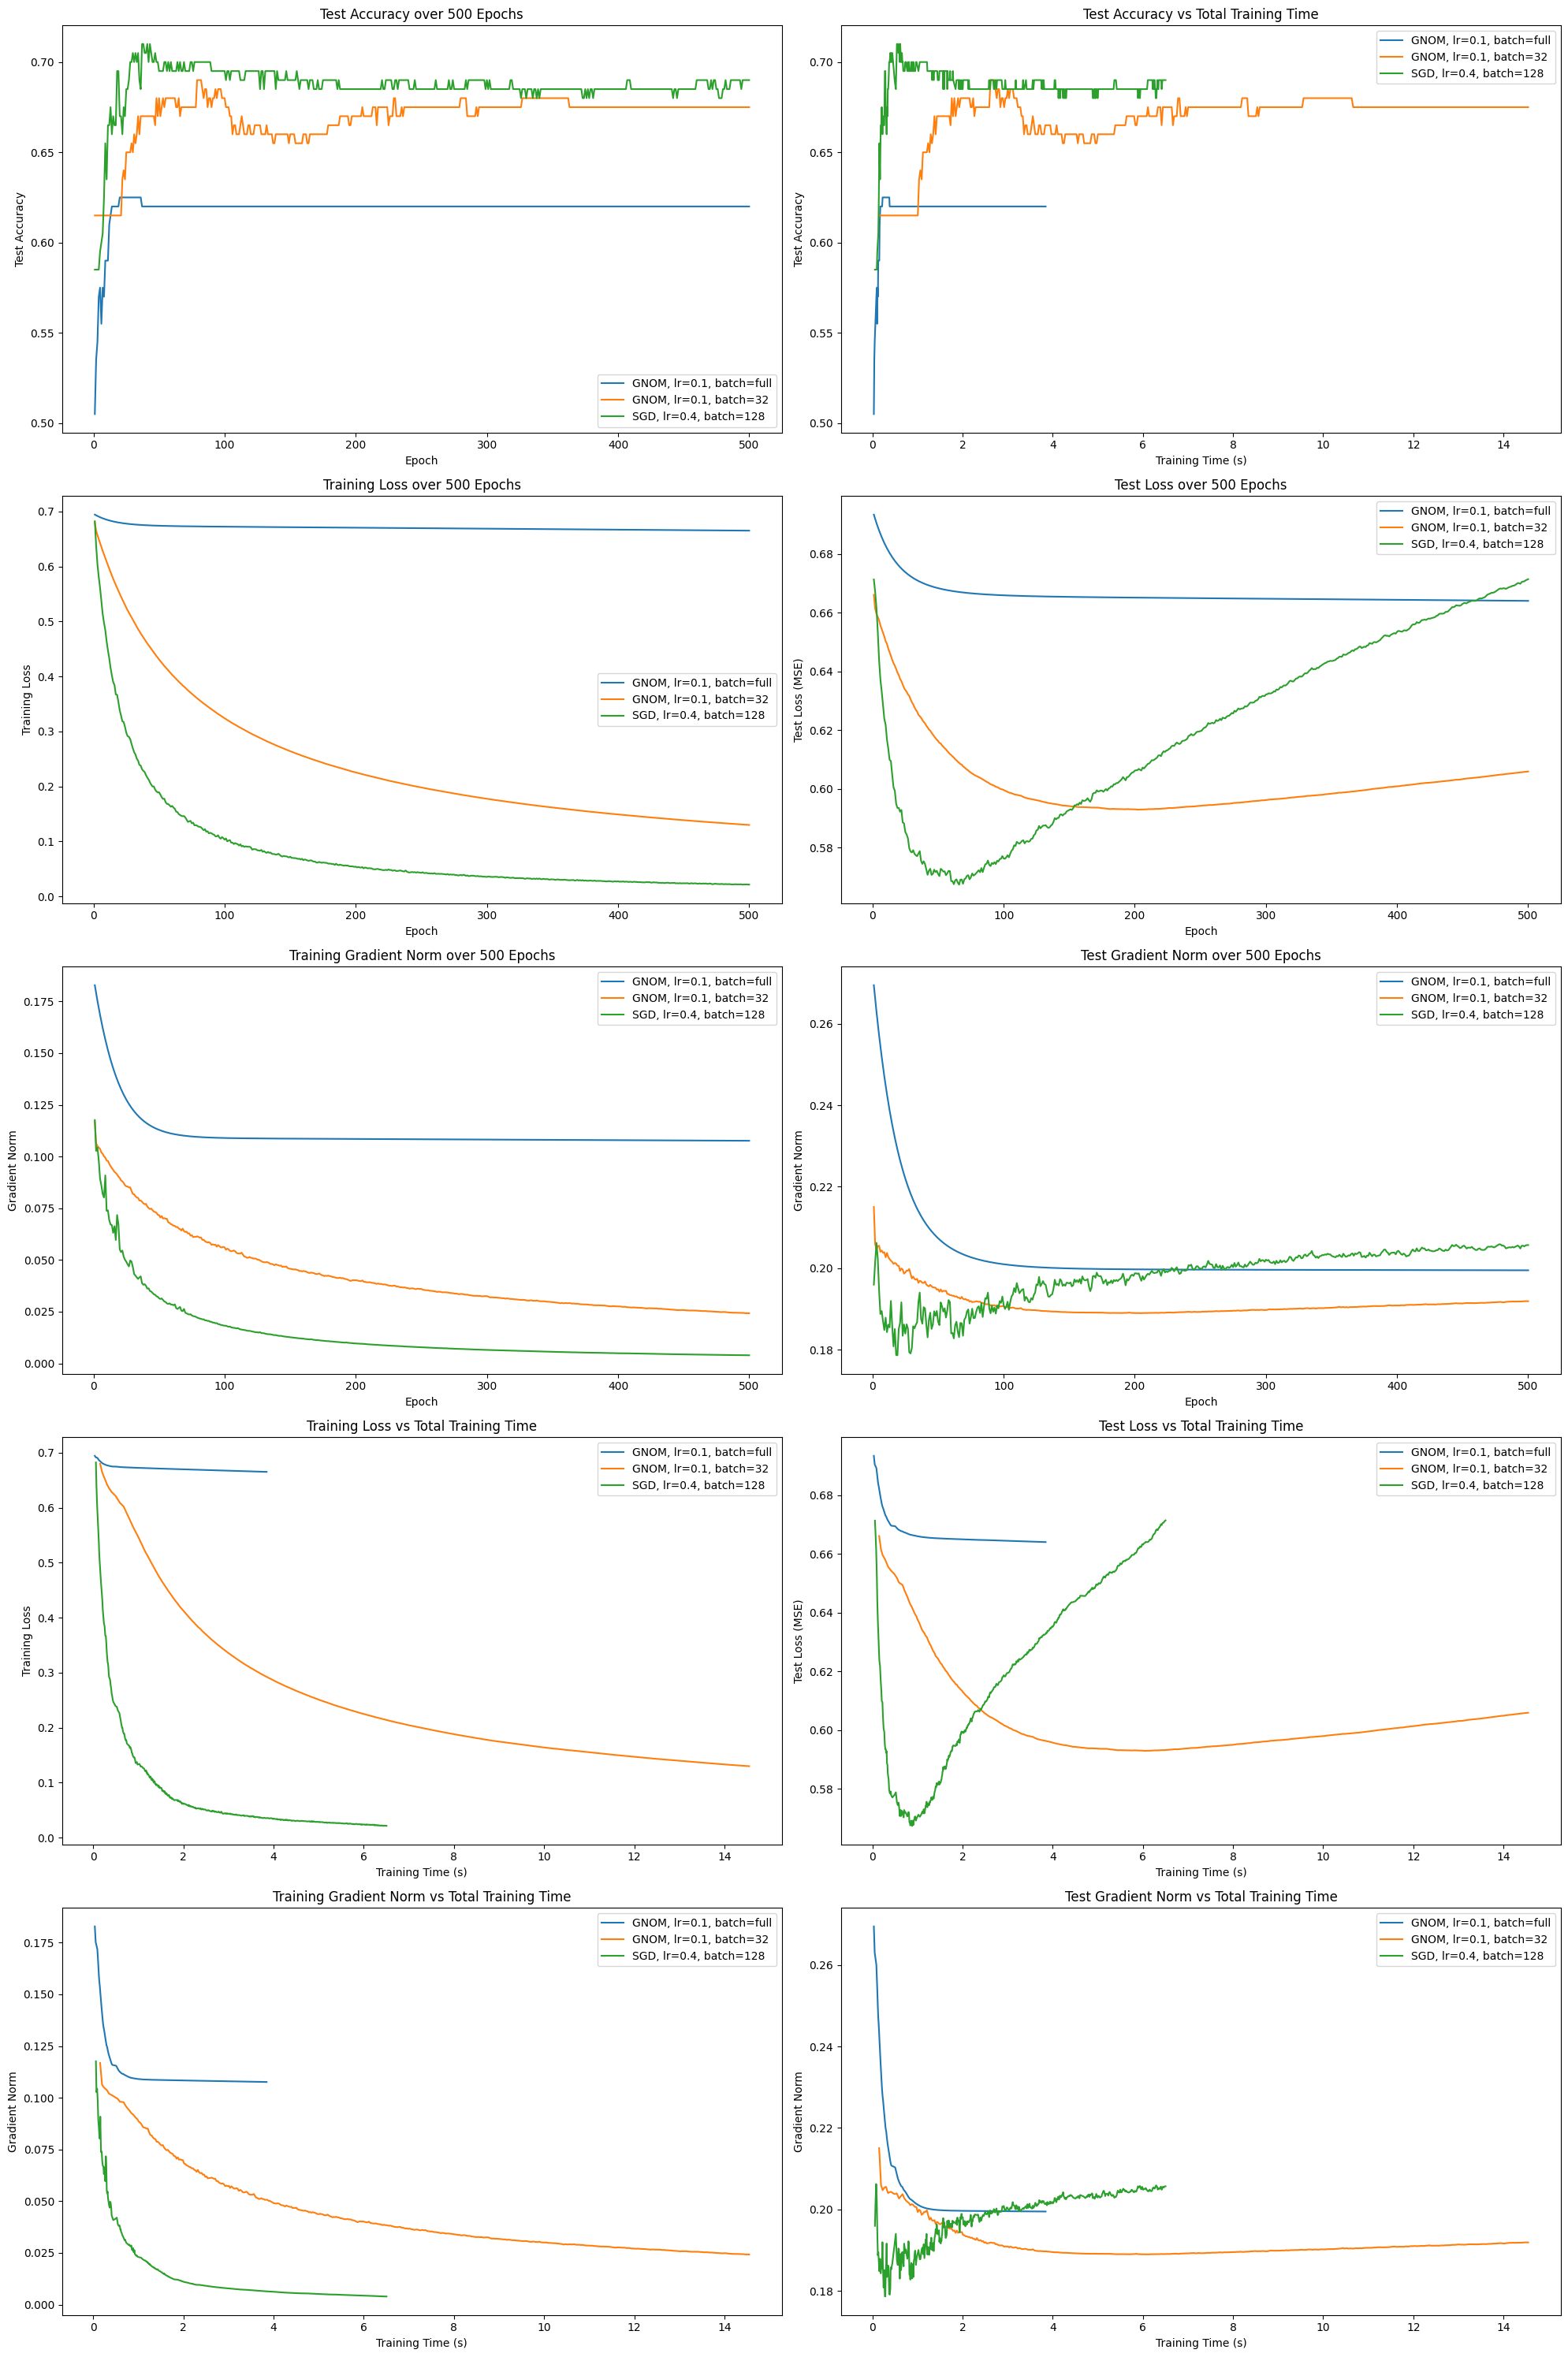

In [16]:
# COMPARING BEST RESULTS @500 EPOCHS
# GNOM w lr = 0.1, batch = full, 32
# SGD w lr = 0.4, batch = 128


file_path1 = "generated/n_2000_m_1000/GNOM/lr-0.1/500/no_batching/2024-10-04-10:30:11/results.csv"
file_path2 = "generated/n_2000_m_1000/GNOM/lr-0.1/500/32/2024-10-04-10:29:45/results.csv"
file_path3 = "generated/n_2000_m_1000/GD/lr-0.4/500/128/2024-10-04-10:28:56/results.csv"

files = [file_path1, file_path2, file_path3]
labels = ["GNOM, lr=0.1, batch=full", "GNOM, lr=0.1, batch=32", "SGD, lr=0.4, batch=128"]

plot_results(files, labels)

### n = 2000, m = 4000

In [ ]:
# GNOM

lr_0_3_file_path = "generated/n_2000_m_4000/GNOM/lr-0.3/200/no_batching/2024-10-03-16:40:35/results.csv"
lr_0_2_file_path = "generated/n_2000_m_4000/GNOM/lr-0.2/200/no_batching/2024-10-03-16:40:18/results.csv"
lr_0_1_file_path = "generated/n_2000_m_4000/GNOM/lr-0.1/200/no_batching/2024-10-03-16:40:03/results.csv"
lr_0_01_file_path = "generated/n_2000_m_4000/GNOM/lr-0.01/200/no_batching/2024-10-03-16:39:47/results.csv"
lr_0_001_file_path = "generated/n_2000_m_4000/GNOM/lr-0.001/200/no_batching/2024-10-03-16:39:26/results.csv"

# Read CSV files
lr_0_3 = pd.read_csv(lr_0_3_file_path)
lr_0_2 = pd.read_csv(lr_0_2_file_path)
lr_0_1 = pd.read_csv(lr_0_1_file_path)
lr_0_01 = pd.read_csv(lr_0_01_file_path)
lr_0_001 = pd.read_csv(lr_0_001_file_path)

In [ ]:
# SGD

lr_0_3_file_path = "generated/n_2000_m_4000/GD/lr-0.3/200/no_batching/2024-10-03-16:38:58/results.csv"
lr_0_2_file_path = "generated/n_2000_m_4000/GD/lr-0.2/200/no_batching/2024-10-03-16:38:43/results.csv"
lr_0_1_file_path = "generated/n_2000_m_4000/GD/lr-0.1/200/no_batching/2024-10-03-16:38:30/results.csv"
lr_0_01_file_path = "generated/n_2000_m_4000/GD/lr-0.01/200/no_batching/2024-10-03-16:38:15/results.csv"
lr_0_001_file_path = "generated/n_2000_m_4000/GD/lr-0.001/200/no_batching/2024-10-03-16:37:48/results.csv"

# Read CSV files
lr_0_3 = pd.read_csv(lr_0_3_file_path)
lr_0_2 = pd.read_csv(lr_0_2_file_path)
lr_0_1 = pd.read_csv(lr_0_1_file_path)
lr_0_01 = pd.read_csv(lr_0_01_file_path)
lr_0_001 = pd.read_csv(lr_0_001_file_path)

### n = 8000, m = 1000

In [ ]:
# GNOM

lr_0_3_file_path = "arcene/GNOM/lr-0.1/200/no_batching/2024-09-30-16:06:45/results.csv"
lr_0_2_file_path = "arcene/GNOM/lr-0.01/200/no_batching/2024-09-30-16:06:32/results.csv"
lr_0_1_file_path = "arcene/GNOM/lr-0.005/200/no_batching/2024-09-30-16:06:00/results.csv"
lr_0_01_file_path = "arcene/GNOM/lr-0.001/200/no_batching/2024-09-30-16:05:34/results.csv"
lr_0_001_file_path = "arcene/GNOM/lr-0.0001/200/no_batching/2024-09-30-16:07:01/results.csv"

# Read CSV files
lr_0_3 = pd.read_csv(lr_0_3_file_path)
lr_0_2 = pd.read_csv(lr_0_2_file_path)
lr_0_1 = pd.read_csv(lr_0_1_file_path)
lr_0_01 = pd.read_csv(lr_0_01_file_path)
lr_0_001 = pd.read_csv(lr_0_001_file_path)

In [ ]:
# SGD

lr_0_3_file_path = "arcene/GNOM/lr-0.1/200/no_batching/2024-09-30-16:06:45/results.csv"
lr_0_2_file_path = "arcene/GNOM/lr-0.01/200/no_batching/2024-09-30-16:06:32/results.csv"
lr_0_1_file_path = "arcene/GNOM/lr-0.005/200/no_batching/2024-09-30-16:06:00/results.csv"
lr_0_01_file_path = "arcene/GNOM/lr-0.001/200/no_batching/2024-09-30-16:05:34/results.csv"
lr_0_001_file_path = "arcene/GNOM/lr-0.0001/200/no_batching/2024-09-30-16:07:01/results.csv"

# Read CSV files
lr_0_3 = pd.read_csv(lr_0_3_file_path)
lr_0_2 = pd.read_csv(lr_0_2_file_path)
lr_0_1 = pd.read_csv(lr_0_1_file_path)
lr_0_01 = pd.read_csv(lr_0_01_file_path)
lr_0_001 = pd.read_csv(lr_0_001_file_path)

### n = 8000, m = 4000

In [ ]:
# GNOM

lr_0_3_file_path = "arcene/GNOM/lr-0.1/200/no_batching/2024-09-30-16:06:45/results.csv"
lr_0_2_file_path = "arcene/GNOM/lr-0.01/200/no_batching/2024-09-30-16:06:32/results.csv"
lr_0_1_file_path = "arcene/GNOM/lr-0.005/200/no_batching/2024-09-30-16:06:00/results.csv"
lr_0_01_file_path = "arcene/GNOM/lr-0.001/200/no_batching/2024-09-30-16:05:34/results.csv"
lr_0_001_file_path = "arcene/GNOM/lr-0.0001/200/no_batching/2024-09-30-16:07:01/results.csv"

# Read CSV files
lr_0_3 = pd.read_csv(lr_0_3_file_path)
lr_0_2 = pd.read_csv(lr_0_2_file_path)
lr_0_1 = pd.read_csv(lr_0_1_file_path)
lr_0_01 = pd.read_csv(lr_0_01_file_path)
lr_0_001 = pd.read_csv(lr_0_001_file_path)

In [ ]:
# SGD

lr_0_3_file_path = "arcene/GNOM/lr-0.1/200/no_batching/2024-09-30-16:06:45/results.csv"
lr_0_2_file_path = "arcene/GNOM/lr-0.01/200/no_batching/2024-09-30-16:06:32/results.csv"
lr_0_1_file_path = "arcene/GNOM/lr-0.005/200/no_batching/2024-09-30-16:06:00/results.csv"
lr_0_01_file_path = "arcene/GNOM/lr-0.001/200/no_batching/2024-09-30-16:05:34/results.csv"
lr_0_001_file_path = "arcene/GNOM/lr-0.0001/200/no_batching/2024-09-30-16:07:01/results.csv"

# Read CSV files
lr_0_3 = pd.read_csv(lr_0_3_file_path)
lr_0_2 = pd.read_csv(lr_0_2_file_path)
lr_0_1 = pd.read_csv(lr_0_1_file_path)
lr_0_01 = pd.read_csv(lr_0_01_file_path)
lr_0_001 = pd.read_csv(lr_0_001_file_path)